In [1]:
USE_MP=False
import silq
silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Connected to: Agilent Technologies E8267D (serial:SG53400039, firmware:C.06.22) in 0.05s
Initializing layout
Initializing data
Initializing analysis
Initializing parameters
Initializing plotting
Initialization complete


<IPython.core.display.Javascript object>


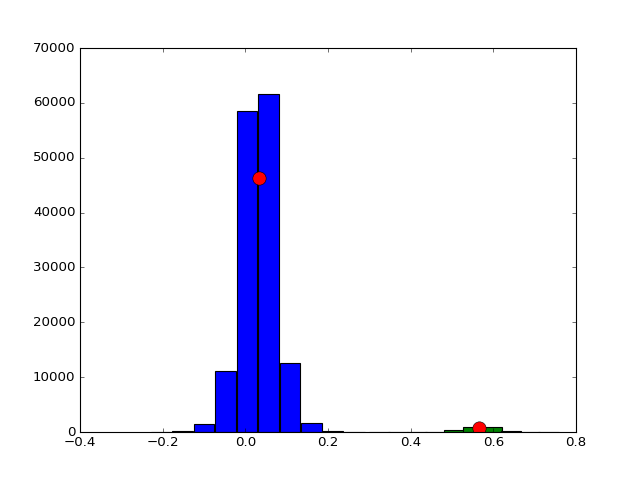

In [2]:
ELR_parameter.setup(samples=30)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read, plot=True)

In [3]:
steered_initialization = SteeredInitialization(name='steered_initialization',
                                               t_no_blip=50, t_max_wait=200, t_buffer=40)
steered_controller.record_initialization_traces(True)

load_pulse = DCPulse(name='load', amplitude=1, duration=5, acquire=True)
read_pulse = DCPulse(name='read', amplitude=0, duration=50, acquire=True)
final_pulse = DCPulse(name='final', amplitude=0, duration=2)
pulse_sequence = PulseSequence([steered_initialization, load_pulse, read_pulse, final_pulse])

layout.target_pulse_sequence(pulse_sequence)
layout.setup(samples=20, readout_threshold_voltage=threshold_voltage)

Starting active 0.09 s
starting readout after 0.13 s, buffers 0
finished trace after 0.21 s
Starting active 0.08 s
starting readout after 0.12 s, buffers 0
finished trace after 0.20 s
Starting active 0.08 s
starting readout after 0.12 s, buffers 0
finished trace after 0.20 s
Starting active 0.08 s
starting readout after 0.12 s, buffers 0
finished trace after 0.20 s
Starting active 0.07 s
starting readout after 0.11 s, buffers 0
finished trace after 0.19 s
Starting active 0.08 s
starting readout after 0.13 s, buffers 0
finished trace after 0.20 s
Starting active 0.08 s
starting readout after 0.12 s, buffers 0
finished trace after 0.20 s
Starting active 0.21 s
starting readout after 0.23 s, buffers 0
finished trace after 0.31 s
Starting active 0.08 s
starting readout after 0.12 s, buffers 0
finished trace after 0.20 s
Starting active 0.08 s
starting readout after 0.12 s, buffers 0
finished trace after 0.20 s
Starting active 0.09 s
starting readout after 0.13 s, buffers 0
finished trace a

<IPython.core.display.Javascript object>


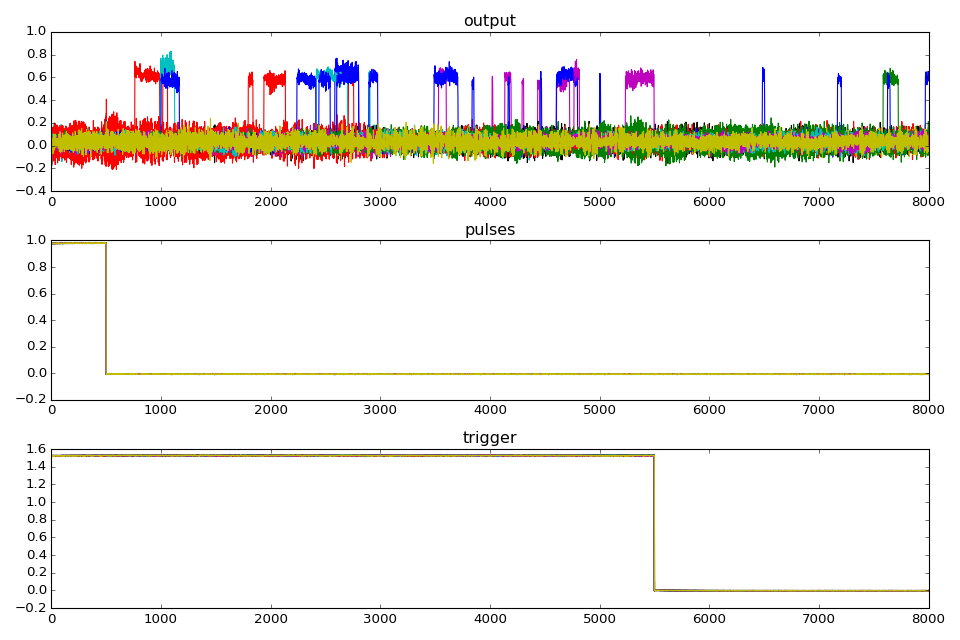

In [4]:
result = layout.do_acquisition(return_dict=True)

fig, axes = plt.subplots(3,1, figsize=(12,8))
for (ch_name, traces), ax in zip(result.items(), axes):
    ax.plot(traces.transpose())
    ax.set_title(ch_name)
plt.tight_layout()

In [5]:
steered_controller.post_initialization_traces

{'A': array([[ 0.03125   ,  0.05322266,  0.03125   , ...,  0.015625  ,
          0.01831055,  0.04077148],
        [-0.02246094,  0.02856445,  0.09204102, ...,  0.04370117,
          0.04345703,  0.06713867],
        [ 0.02099609,  0.07177734,  0.03125   , ...,  0.0065918 ,
          0.02270508,  0.04492188],
        ..., 
        [ 0.06420898,  0.09594727,  0.02709961, ...,  0.0859375 ,
          0.11938477,  0.12084961],
        [ 0.02832031, -0.02832031, -0.01806641, ...,  0.00830078,
          0.02807617,  0.02172852],
        [ 0.09765625,  0.07714844,  0.05371094, ...,  0.00219727,
          0.01074219,  0.06811523]]),
 'B': array([[ -1.46484375e-03,  -3.17382812e-03,  -1.70898438e-03, ...,
           1.52343750e+00,   1.52783203e+00,   1.52612305e+00],
        [ -1.95312500e-03,  -2.44140625e-04,  -3.41796875e-03, ...,
           1.52661133e+00,   1.52441406e+00,   1.52612305e+00],
        [ -3.17382812e-03,  -2.92968750e-03,  -2.68554688e-03, ...,
           1.52758789e+00,   1

<IPython.core.display.Javascript object>


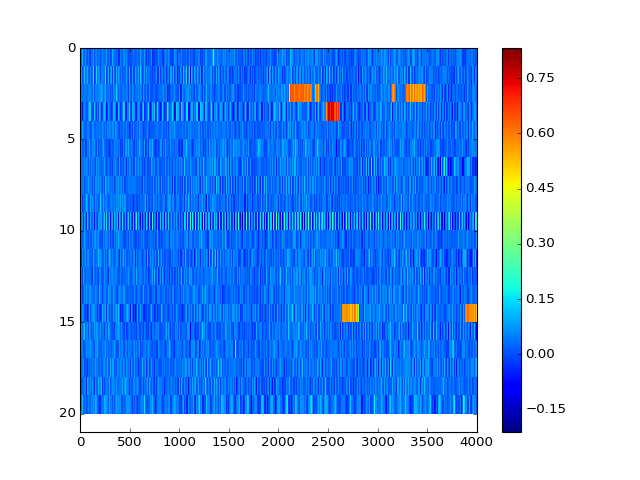

In [8]:
plot_traces(steered_controller.post_initialization_traces['A'])

# For PyCharm console

In [ ]:
USE_MP=False
import silq
silq.initialize("EWJN")


ELR_parameter.setup(samples=50)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read, plot=True)


steered_initialization = SteeredInitialization(name='steered_initialization',
                                               t_no_blip=50, t_max_wait=200, t_buffer=5)
load_pulse = DCPulse(name='load', amplitude=1.5,
                     duration=5, acquire=True)
read_pulse = DCPulse(name='read', amplitude=0,
                      duration=50, acquire=True)
final_pulse = DCPulse(name='final', amplitude=0,
                      duration=2)
pulses = [steered_initialization, load_pulse, read_pulse, final_pulse]
pulse_sequence = PulseSequence(pulses=pulses)

layout.target_pulse_sequence(pulse_sequence)

layout.setup(samples=3,
             readout_threshold_voltage=threshold_voltage)